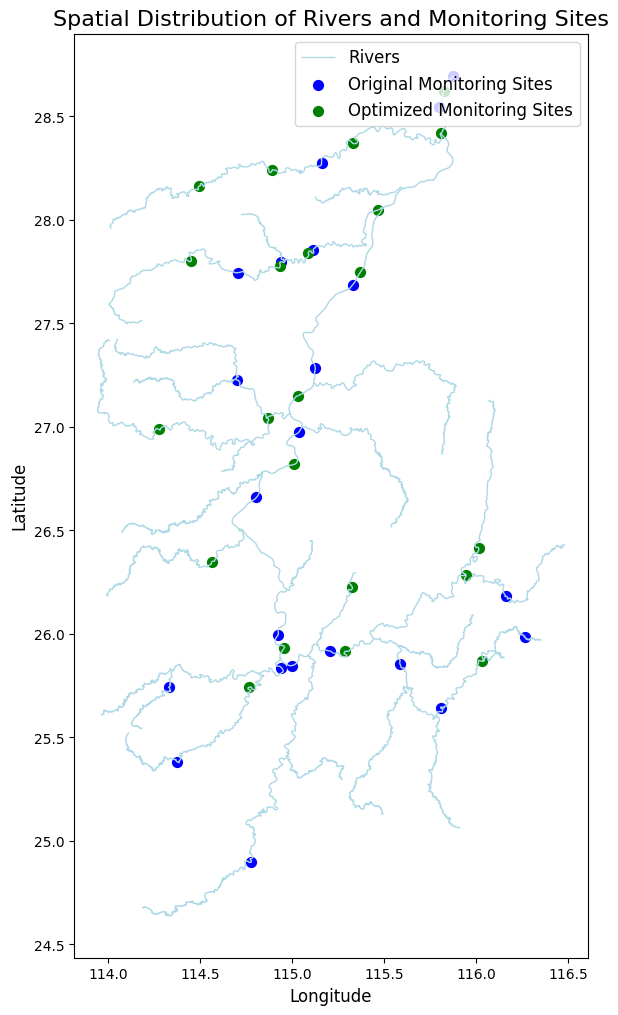

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取三个 shp 文件
optimized_gdf = gpd.read_file("../data/优化后的常规监测站点.shp")  # 优化后的常规监测断面
original_gdf = gpd.read_file("../data/常规监测断面.shp")  # 原常规监测断面
river_gdf = gpd.read_file("../data/最新赣江河流.shp")  # 河流

# 设置地图绘制
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# 绘制河流
river_gdf.plot(ax=ax, color="lightblue", linewidth=1, label="Rivers")

# 绘制原常规监测断面
original_gdf.plot(ax=ax, color="blue", label="Original Monitoring Sites", marker="o", markersize=50)

# 绘制优化后的常规监测断面
optimized_gdf.plot(ax=ax, color="green", label="Optimized Monitoring Sites", marker="o", markersize=50)

# 添加标题、图例和轴标签
plt.title("Spatial Distribution of Rivers and Monitoring Sites", fontsize=16)
plt.legend(loc="upper right", fontsize=12)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# 显示地图
plt.show()


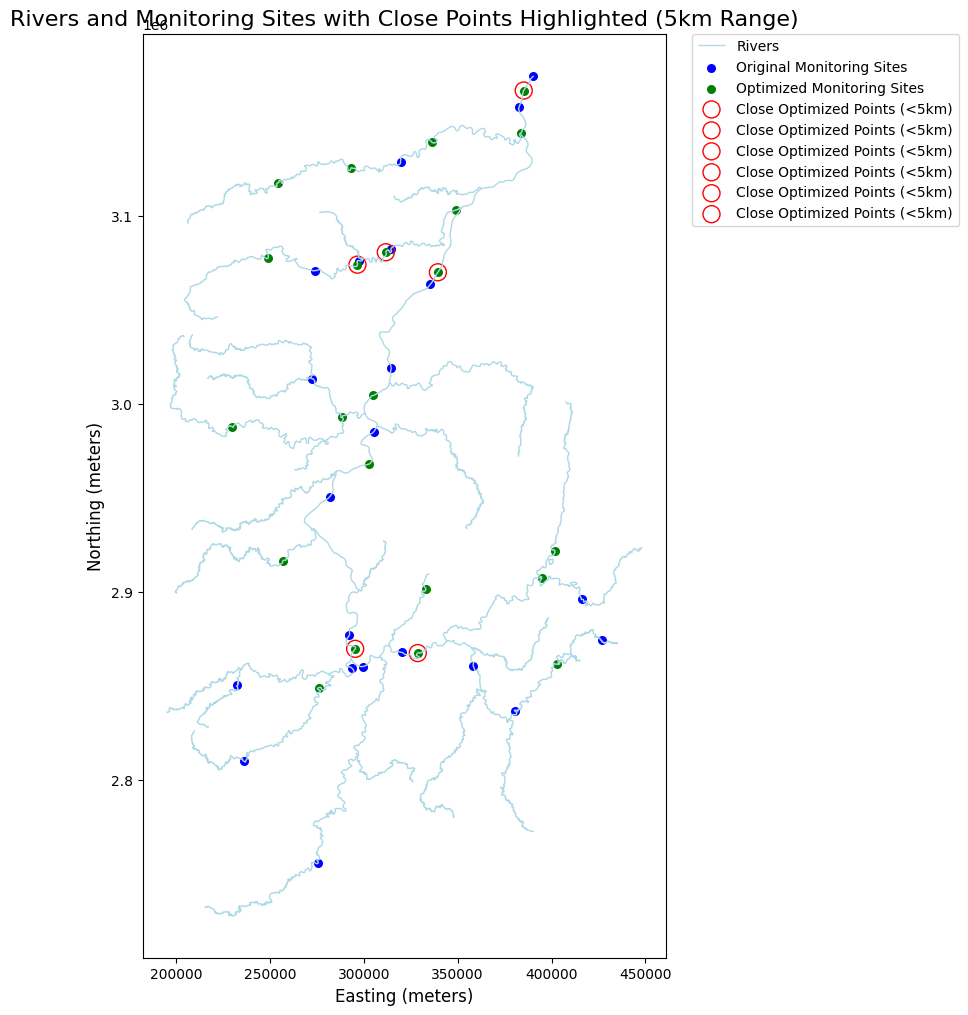

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取 shp 文件
original_gdf = gpd.read_file("../data/常规监测断面.shp")  # 原常规监测断面
optimized_gdf = gpd.read_file("../data/优化后的常规监测站点.shp")  # 优化后的常规监测断面
river_gdf = gpd.read_file("../data/最新赣江河流.shp")  # 河流数据

# 将坐标系从 EPSG:4326 转换为 EPSG:32650 (UTM Zone 50N)
original_gdf = original_gdf.to_crs(epsg=32650)
optimized_gdf = optimized_gdf.to_crs(epsg=32650)
river_gdf = river_gdf.to_crs(epsg=32650)

# 计算优化断面到原断面的最近距离并标记接近点
threshold_distance = 10000  # 距离阈值为10公里
close_original_points = []  # 存储接近的原断面点
close_optimized_points = []  # 存储接近的优化断面点

for _, opt_point in optimized_gdf.iterrows():
    # 计算到所有原断面的距离
    distances = original_gdf.distance(opt_point.geometry)
    min_dist = distances.min()  # 最近距离
    if min_dist <= threshold_distance:
        # 找到最近的原断面
        nearest_original_idx = distances.idxmin()
        close_original_points.append(original_gdf.loc[nearest_original_idx].geometry)
        close_optimized_points.append(opt_point.geometry)

# 可视化结果
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# 绘制河流（背景）
river_gdf.plot(ax=ax, color="lightblue", linewidth=1, label="Rivers")

# 绘制原常规监测断面（蓝色点）
original_gdf.plot(ax=ax, color="blue", label="Original Monitoring Sites", markersize=30)

# 绘制优化后的常规监测断面（绿色点）
optimized_gdf.plot(ax=ax, color="green", label="Optimized Monitoring Sites", markersize=30)



# 圈出接近的优化断面点（红色圆圈）
for point in close_optimized_points:
    ax.scatter(point.x, point.y, edgecolor="red", facecolor="none", s=150, label="Close Optimized Points (<5km)")

# 添加标题、图例和轴标签
# 添加标题、图例和轴标签
plt.title("Rivers and Monitoring Sites with Close Points Highlighted (5km Range)", fontsize=16)

# 调整图例的位置，将其移到地图外
plt.legend(
    loc="upper left",  # 图例位置相对于bbox的锚点
    bbox_to_anchor=(1.05, 1),  # 图例移出地图，设置图例框的相对位置
    borderaxespad=0.,  # 图例与地图之间的间距
    fontsize=10  # 调整图例文字大小
)

# 添加坐标轴标签
plt.xlabel("Easting (meters)", fontsize=12)
plt.ylabel("Northing (meters)", fontsize=12)

# 显示地图
plt.show()


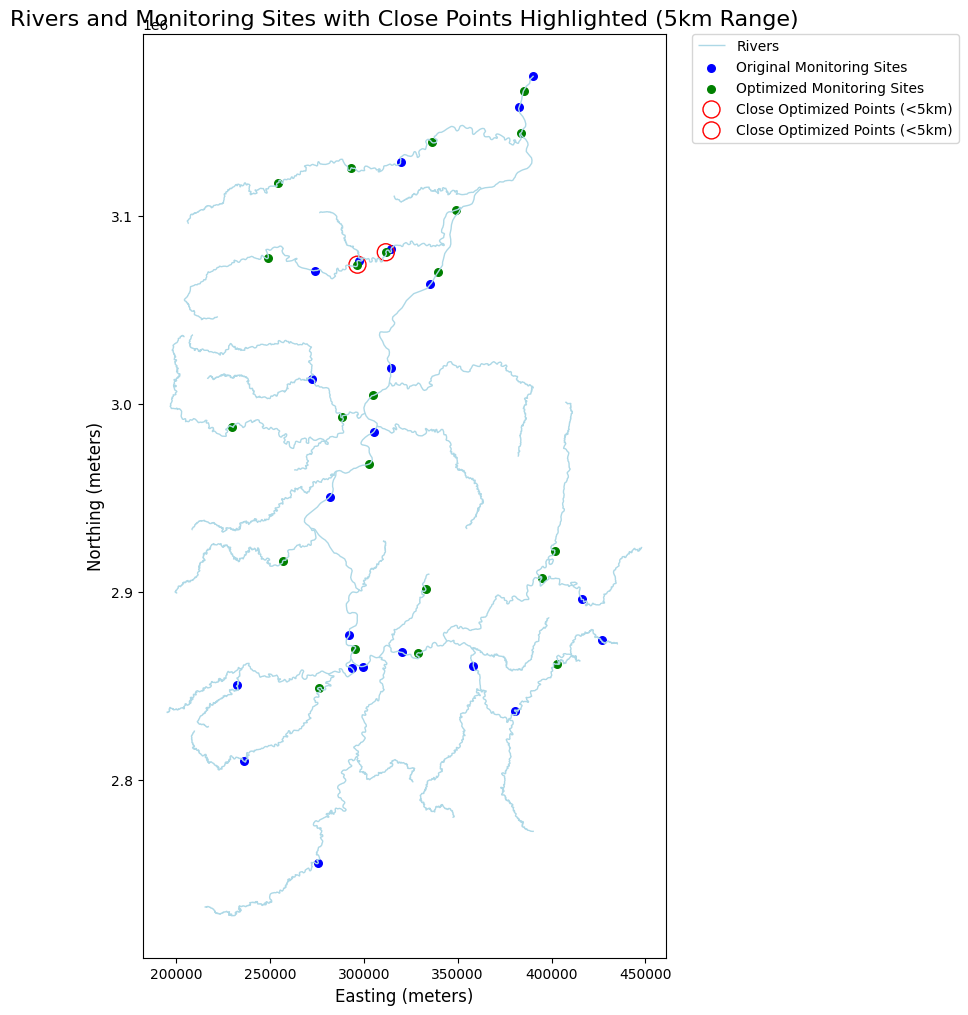

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取 shp 文件
original_gdf = gpd.read_file("../data/常规监测断面.shp")  # 原常规监测断面
optimized_gdf = gpd.read_file("../data/优化后的常规监测站点.shp")  # 优化后的常规监测断面
river_gdf = gpd.read_file("../data/最新赣江河流.shp")  # 河流数据

# 将坐标系从 EPSG:4326 转换为 EPSG:32650 (UTM Zone 50N)
original_gdf = original_gdf.to_crs(epsg=32650)
optimized_gdf = optimized_gdf.to_crs(epsg=32650)
river_gdf = river_gdf.to_crs(epsg=32650)

# 计算优化断面到原断面的最近距离并标记接近点
threshold_distance = 5000  # 距离阈值为10公里
close_original_points = []  # 存储接近的原断面点
close_optimized_points = []  # 存储接近的优化断面点

for _, opt_point in optimized_gdf.iterrows():
    # 计算到所有原断面的距离
    distances = original_gdf.distance(opt_point.geometry)
    min_dist = distances.min()  # 最近距离
    if min_dist <= threshold_distance:
        # 找到最近的原断面
        nearest_original_idx = distances.idxmin()
        close_original_points.append(original_gdf.loc[nearest_original_idx].geometry)
        close_optimized_points.append(opt_point.geometry)

# 可视化结果
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# 绘制河流（背景）
river_gdf.plot(ax=ax, color="lightblue", linewidth=1, label="Rivers")

# 绘制原常规监测断面（蓝色点）
original_gdf.plot(ax=ax, color="blue", label="Original Monitoring Sites", markersize=30)

# 绘制优化后的常规监测断面（绿色点）
optimized_gdf.plot(ax=ax, color="green", label="Optimized Monitoring Sites", markersize=30)



# 圈出接近的优化断面点（红色圆圈）
for point in close_optimized_points:
    ax.scatter(point.x, point.y, edgecolor="red", facecolor="none", s=150, label="Close Optimized Points (<5km)")

# 添加标题、图例和轴标签
# 添加标题、图例和轴标签
plt.title("Rivers and Monitoring Sites with Close Points Highlighted (5km Range)", fontsize=16)

# 调整图例的位置，将其移到地图外
plt.legend(
    loc="upper left",  # 图例位置相对于bbox的锚点
    bbox_to_anchor=(1.05, 1),  # 图例移出地图，设置图例框的相对位置
    borderaxespad=0.,  # 图例与地图之间的间距
    fontsize=10  # 调整图例文字大小
)

# 添加坐标轴标签
plt.xlabel("Easting (meters)", fontsize=12)
plt.ylabel("Northing (meters)", fontsize=12)

# 显示地图
plt.show()
